<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Notebook-Configuration" data-toc-modified-id="Notebook-Configuration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Notebook Configuration</a></span><ul class="toc-item"><li><span><a href="#Google-drive" data-toc-modified-id="Google-drive-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Google drive</a></span></li><li><span><a href="#Warning" data-toc-modified-id="Warning-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Warning</a></span></li><li><span><a href="#Matplotlib" data-toc-modified-id="Matplotlib-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Matplotlib</a></span></li><li><span><a href="#TensorFlow" data-toc-modified-id="TensorFlow-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>TensorFlow</a></span></li><li><span><a href="#Random-seed" data-toc-modified-id="Random-seed-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Random seed</a></span></li></ul></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Training</a></span></li><li><span><a href="#Testing" data-toc-modified-id="Testing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Testing</a></span></li></ul></div>

<b>
<p>
<center>
<font size="5">
Popular Machine Learning Methods: Idea, Practice and Math
</font>
</center>
</p>
    


<p>
<center>
<font size="3">
Data Science, Columbian College of Arts & Sciences, George Washington University
</font>
</center>
</p>

<p>
<center>
<font size="3">
Osemekhian Ehilen
</font>
</center>
</p>
</b>

# Overview

- This notebook includes exercise for Recurrent Neural Networks 
- See the accompanied slides in our [github repository](https://github.com/yuxiaohuang/teaching/tree/master/gwu/machine_learning_I/spring_2022/slides/p3_deep_learning/p3_c2_supervised_learning/p3_c2_s4_recurrent_neural_networks).
- Here we will work on TensorFlow Dataset [yelp_polarity_reviews](https://www.tensorflow.org/datasets/catalog/yelp_polarity_reviews).


# Notebook Configuration

## Google drive

In [ ]:
# IF YOU ARE NOT USING GOOGLE COLAB YOU CAN COMMENT
# OUT THE from google.colab import drive AND drive.mount('/content/drive')
# THEN MAKE YOUR OWN PATH abspath_curr
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')
#"G:\My Drive\Colab Notebooks\code"

# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/Colab Notebooks/ML1_Assignment/'

Mounted at /content/drive


## Warning

In [ ]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

## Matplotlib

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

## TensorFlow

In [ ]:
# The magic below allows us to use tensorflow version 2.x
%tensorflow_version 2.x 
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow import keras

## Random seed

In [ ]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

# Data Preprocessing

## **Loading Data**

In [ ]:
import os

# Make directory
directory = os.path.dirname(abspath_curr + 'data_yelp_reviews')
if not os.path.exists(directory):
    os.makedirs(directory)
#---------------------------------------------------
# Downloading the data to the directory

import tensorflow_datasets as tfds

# Get the name of the data
data_name = 'yelp_polarity_reviews'

# load data
data, info= tfds.load(name=data_name, data_dir= abspath_curr + 'data_yelp_reviews',
                      as_supervised=True,
                      with_info=True)
# name of target variable
target= 'label'

## **Getting Split Info**

In [ ]:
info.splits

{'test': <tfds.core.SplitInfo num_examples=38000>,
 'train': <tfds.core.SplitInfo num_examples=560000>}

## **Classes**

In [ ]:
classes= info.features[target].names
# print classes
classes 

['1', '2']

## **Number of Classes**

In [ ]:
n_classes= info.features[target].num_classes
# print number of classes
n_classes

2


## **Getting training and validation and test data**

In [ ]:
# Set the training, validation and test split
split_train, split_valid, split_test = 'train[:70%]', 'train[70%:]', 'test'

# Get the training data
data_train = tfds.load(name=data_name,
                       split=split_train,
                       data_dir=abspath_curr + 'data_yelp_reviews',
                       as_supervised=True)

# Get the validation data
data_valid = tfds.load(name=data_name,
                       split=split_valid,
                       data_dir=abspath_curr + 'data_yelp_reviews',
                       as_supervised=True)

# Get the test data
data_test = tfds.load(name=data_name,
                      split=split_test,
                      data_dir=abspath_curr + 'data_yelp_reviews',
                      as_supervised=True)

## **Batching and prefetching the data**

In [ ]:
# Set the batch size
batch_size = 16

# Batch and prefetch the training data
data_train = data_train.batch(batch_size).prefetch(1)

# Batch and prefetch the validation data
data_valid = data_valid.batch(batch_size).prefetch(1)

# Batch and prefetch the testing data
data_test = data_test.batch(batch_size).prefetch(1)

# Training

In [ ]:
# Implement me

## **Directory for saving model**

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/RNN_model_yelp_reviews/')
if not os.path.exists(directory):
    os.makedirs(directory)

## **Building the architecture of the model**

In [ ]:
# Get the model
model = keras.Sequential([hub.KerasLayer('https://tfhub.dev/google/tf2-preview/nnlm-en-dim50/1',
                                         trainable=False,
                                         dtype=tf.string,
                                         input_shape=[],
                                         output_shape=[50]),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(1, activation='sigmoid')])

# Get the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense (Dense)               (None, 128)               6528      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 48,197,257
Trainable params: 6,657
Non-trainable params: 48,190,600
_________________________________________________________________


## **Freezing the pretrained layers**

In [ ]:
# Freeze the pretrained layers
model.layers[0].trainable = False

# Get the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense (Dense)               (None, 128)               6528      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 48,197,257
Trainable params: 6,657
Non-trainable params: 48,190,600
_________________________________________________________________


## **Setting Callbacks**

In [ ]:
# ModelCheckpoint callback to_save_the_model
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=abspath_curr + '/result/RNN_model_yelp_reviews/model.h5',
                                                      save_best_only=True,
                                                      save_weights_only=True)


# EarlyStopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

# ReduceLROnPlateau callback #Performance Scheduling
reduce_lr_on_plateau_cb = keras.callbacks.ReduceLROnPlateau(factor=0.1,
                                                            patience=5)

## **Compiling the Model**

In [ ]:
# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',    
              metrics=['accuracy'])
# loss= sparse_categorical_crossentropy  for multiClass

## **Training the Model**

In [ ]:
# Train, evaluate and save the best model
history = model.fit(data_train,
                    epochs=10,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/10
24500/24500 [==============================] - 119s 5ms/step - loss: 0.4418 - accuracy: 0.7907 - val_loss: 0.4308 - val_accuracy: 0.7969 - lr: 0.0010
Epoch 2/10
24500/24500 [==============================] - 112s 5ms/step - loss: 0.4287 - accuracy: 0.7984 - val_loss: 0.4274 - val_accuracy: 0.7988 - lr: 0.0010
Epoch 3/10
24500/24500 [==============================] - 108s 4ms/step - loss: 0.4249 - accuracy: 0.8006 - val_loss: 0.4261 - val_accuracy: 0.7998 - lr: 0.0010
Epoch 4/10
24500/24500 [==============================] - 108s 4ms/step - loss: 0.4224 - accuracy: 0.8019 - val_loss: 0.4250 - val_accuracy: 0.8002 - lr: 0.0010
Epoch 5/10
24500/24500 [==============================] - 108s 4ms/step - loss: 0.4206 - accuracy: 0.8028 - val_loss: 0.4247 - val_accuracy: 0.8005 - lr: 0.0010
Epoch 6/10
24500/24500 [==============================] - 108s 4ms/step - loss: 0.4192 - accuracy: 0.8035 - val_loss: 0.4237 - val_accuracy: 0.8008 - lr: 0.0010
Epoch 7/10
24500/24500 [==========

## **Learning curve**

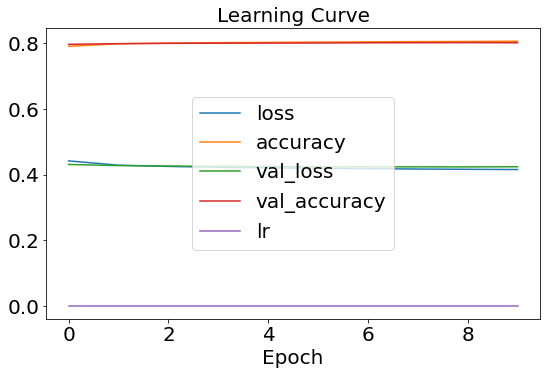

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + 'result/RNN_model_yelp_reviews/')
if not os.path.exists(directory):
    os.makedirs(directory)

import pandas as pd

# Create a figure
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Save and show the figure
plt.tight_layout()
plt.legend(loc='center')
plt.title("Learning Curve")
plt.xlabel('Epoch')
plt.savefig(abspath_curr + 'result/DNN_figure_cifar100/learning_curve_yelp.pdf')
plt.show()

## **Unfreezing the pretrained layers**

In [ ]:
# UnFreezing the pretrained layers
model.layers[0].trainable = True

# Get the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense (Dense)               (None, 128)               6528      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 48,197,257
Trainable params: 48,197,257
Non-trainable params: 0
_________________________________________________________________


## **Compiling the model**

In [ ]:
# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',    
              metrics=['accuracy'])
# loss= sparse_categorical_crossentropy  for multiClass

## **Re-Training the Model**

In [ ]:
# Train, evaluate and save the best model
history = model.fit(data_train,
                    epochs=10,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/10
24500/24500 [==============================] - 401s 16ms/step - loss: 0.2265 - accuracy: 0.9051 - val_loss: 0.1943 - val_accuracy: 0.9212 - lr: 1.0000e-04
Epoch 2/10
24500/24500 [==============================] - 400s 16ms/step - loss: 0.1652 - accuracy: 0.9346 - val_loss: 0.1875 - val_accuracy: 0.9247 - lr: 1.0000e-04
Epoch 3/10
24500/24500 [==============================] - 401s 16ms/step - loss: 0.1466 - accuracy: 0.9431 - val_loss: 0.1872 - val_accuracy: 0.9253 - lr: 1.0000e-04
Epoch 4/10
24500/24500 [==============================] - 401s 16ms/step - loss: 0.1326 - accuracy: 0.9494 - val_loss: 0.1893 - val_accuracy: 0.9256 - lr: 1.0000e-04
Epoch 5/10
24500/24500 [==============================] - 400s 16ms/step - loss: 0.1199 - accuracy: 0.9552 - val_loss: 0.1929 - val_accuracy: 0.9254 - lr: 1.0000e-04
Epoch 6/10
24500/24500 [==============================] - 403s 16ms/step - loss: 0.1078 - accuracy: 0.9606 - val_loss: 0.1983 - val_accuracy: 0.9246 - lr: 1.0000e-04
Epoc

## **Learning Curve 2**

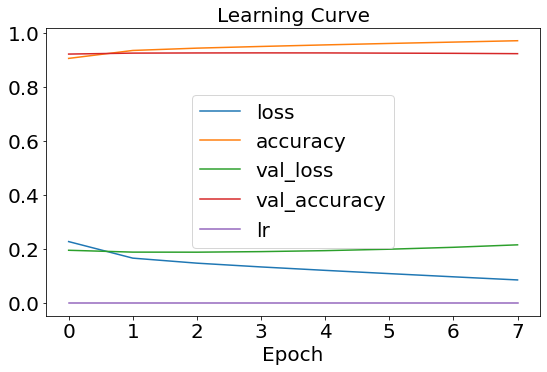

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + 'result/DNN_figure_yelp/')
if not os.path.exists(directory):
    os.makedirs(directory)

import pandas as pd

# Create a figure
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Save and show the figure
plt.tight_layout()
plt.legend(loc='center')
plt.title("Learning Curve")
plt.xlabel('Epoch')
plt.savefig(abspath_curr + 'result/DNN_figure/learning_curve_yelp2.pdf')
plt.show()

# Testing

### **Loading the saved model**

In [ ]:
model.load_weights(filepath=abspath_curr + 'result/RNN_model_yelp_reviews/model.h5')

## **Evaluating the Model**

In [ ]:
loss, accuracy= model.evaluate(data_test)

2375/2375 [==============================] - 9s 4ms/step - loss: 0.1806 - accuracy: 0.9282


## **Reference**


*   The pipeline for this Deep Neural Network is credited to [Yuxiao Huang](https://github.com/yuxiaohuang/teaching/tree/master/gwu/machine_learning_I/spring_2022/code/p3_deep_learning/p3_c2_supervised_learning)

